In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
corr = list(df_train.columns[1:])
corr = df_train[corr].corr()


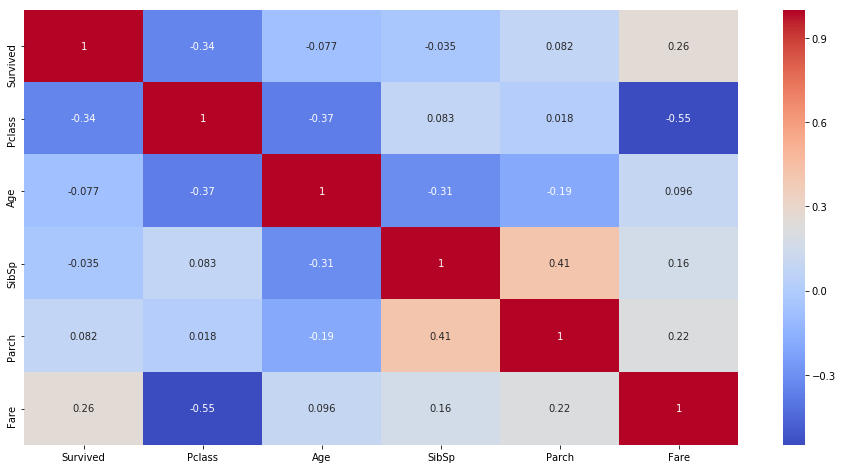

In [9]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True)

In [10]:
a = df_train[['Survived', 'Pclass']].groupby(['Pclass']).mean()
a

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


This indicates a very bad survival rate for people with class 3 tickets.

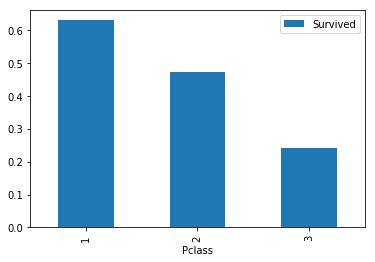

In [11]:
a.plot.bar()

In [12]:
s = df_train[['Survived', 'Sex']].groupby(['Sex']).mean()
s

,Survived
Sex,
female,0.742038
male,0.188908


The survival rate is around 19 percent if you are a male.

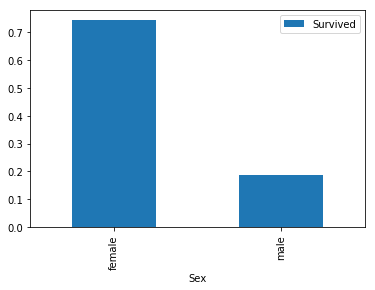

In [13]:
s.plot.bar()

In [14]:
a = df_train[['Survived', 'Sex','Pclass']].groupby(['Sex', 'Pclass']).mean()
a

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### This means a make with class 3 ticket has only 13.5 % chance of survival and a female with class 1 ticket has 96.8% chance of survival.

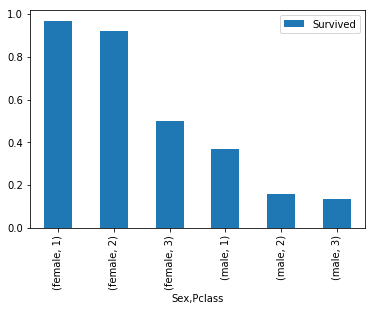

In [15]:
a.plot.bar()

In [16]:
df_train['AgeRange'] = pd.cut(df_train['Age'], 5, precision=0)

In [17]:
ag = df_train[['AgeRange', 'Survived']].groupby(['AgeRange']).mean()
ag

,Survived
AgeRange,
"(0.0, 16.0]",0.550000
"(16.0, 32.0]",0.369942
"(32.0, 48.0]",0.404255
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x504 with 0 Axes>

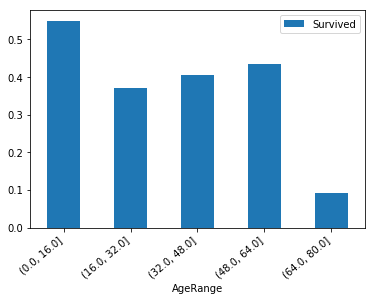

In [18]:
plt.figure(figsize=(12,7))
ax = ag.plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show

In [19]:
df_train[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [20]:
df_train[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [21]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


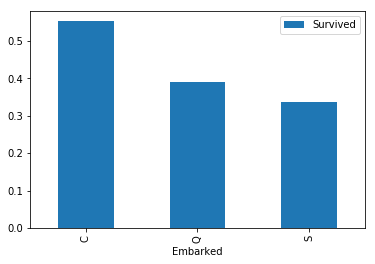

In [22]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar()

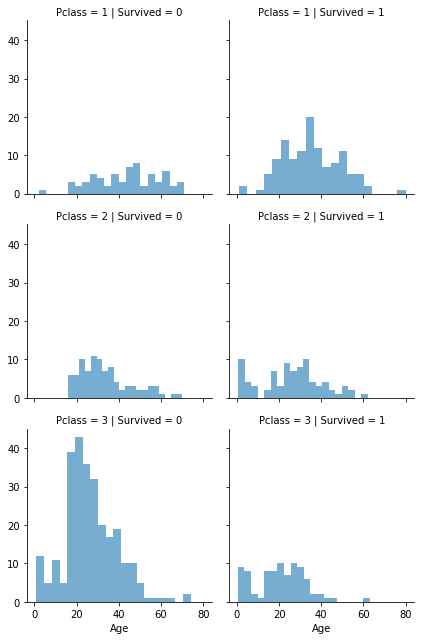

In [23]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.6, bins=20)

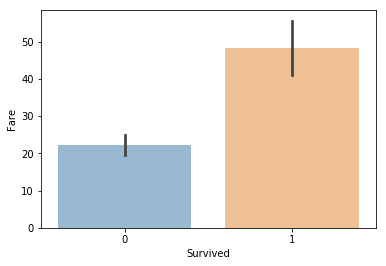

In [24]:
sns.barplot(x='Survived', y='Fare', alpha=.5, data = df_train)

In [25]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


In [27]:
df_train = df_train.drop(['Name','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['Name','Ticket','Cabin'], axis=1)

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange
0,1,0,3,male,22.0,1,0,7.2500,S,"(16.0, 32.0]"
1,2,1,1,female,38.0,1,0,71.2833,C,"(32.0, 48.0]"
2,3,1,3,female,26.0,0,0,7.9250,S,"(16.0, 32.0]"
3,4,1,1,female,35.0,1,0,53.1000,S,"(32.0, 48.0]"
4,5,0,3,male,35.0,0,0,8.0500,S,"(32.0, 48.0]"


In [29]:
di = {'male':0,'female':1}
df_train['Sex'] = df_train['Sex'].map(di)

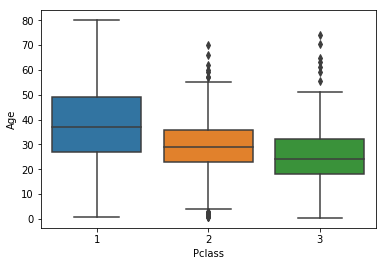

In [30]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

In [31]:
def agerep(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
          return 38
        elif Pclass == 2:
          return 28
        else:
          return 24
    else:
        return Age
        
        
        

In [32]:
df_train['Age'] = df_train[['Age','Pclass']].apply(agerep,axis = 1)

In [33]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [34]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
AgeRange       177
dtype: int64

In [35]:
df_train.loc[ df_train['Age'] <= 16, 'Age'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 32), 'Age'] = 1
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <= 48), 'Age'] = 2
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <= 64), 'Age'] = 3
df_train.loc[ df_train['Age'] > 64, 'Age'] = 4

Based on the average ages found above

In [36]:
df_train = df_train.drop(['AgeRange'], axis=1)

In [37]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [38]:
df_train['Age']=df_train['Age'].astype(int)

In [39]:
df_train['Embarked'] = df_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [40]:
df_train.loc[ df_train['Fare'] <= 7.91, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 7.91) & (df_train['Fare'] <= 14.454), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 31), 'Fare']   = 2
df_train.loc[ df_train['Fare'] > 31, 'Fare'] = 3
df_train['Fare'] = df_train['Fare'].astype(int)

In [41]:
df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test['Age'] = df_test[['Age','Pclass']].apply(agerep,axis = 1)

In [42]:
df_test['Embarked'] = df_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [43]:
df_test.loc[ df_test['Fare'] <= 7.91, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 7.91) & (df_test['Fare'] <= 14.454), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 14.454) & (df_test['Fare'] <= 31), 'Fare']   = 2
df_test.loc[ df_test['Fare'] > 31, 'Fare'] = 3


In [44]:
df_test.loc[ df_train['Age'] <= 16, 'Age'] = 0
df_test.loc[(df_train['Age'] > 16) & (df_test['Age'] <= 32), 'Age'] = 1
df_test.loc[(df_train['Age'] > 32) & (df_test['Age'] <= 48), 'Age'] = 2
df_test.loc[(df_train['Age'] > 48) & (df_test['Age'] <= 64), 'Age'] = 3
df_test.loc[ df_train['Age'] > 64, 'Age'] = 4

df_test['Sex'] = df_test['Sex'].map(di)

df_test['Age']=df_test['Age'].astype(int)

In [45]:
df_test['Fare'] = df_test['Fare'].fillna(2)

In [46]:
df_test['Fare'] = df_test['Fare'].astype(int)

In [47]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,0,0,0,0,2
1,893,3,1,0,1,0,0,0
2,894,2,0,0,0,0,1,2
3,895,3,0,0,0,0,1,0
4,896,3,1,0,1,1,1,0


In [48]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


Using machine learning

In [49]:
test_data = df_gender_submission['Survived']

In [50]:
combined_test = pd.merge(df_test, df_gender_submission, on = 'PassengerId')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
#X_test  = df_test.drop("PassengerId", axis=1)
X_test  = combined_test.drop(["PassengerId","Survived"], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [53]:
# I have created a function to perform k folds cross validation which helps in obtaining a better insight to test the accuracy of the model
# More info at https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0],n_folds= 5)
  error = []
  for train, test in kf:
    # Filter the training data
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  model.fit(data[predictors],data[outcome]) 

Logistic Regression

In [54]:
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)

Y_pred = lg_model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(lg_model,df_train,predictor_var,outcome_var)

Accuracy : 80.135%
Cross-Validation Score : 77.654%
Cross-Validation Score : 78.995%
Cross-Validation Score : 79.068%
Cross-Validation Score : 77.981%
Cross-Validation Score : 78.789%


In [55]:
print('Accuracy on Test data:')
print(accuracy_score(combined_test['Survived'], Y_pred))
print('\n')
print(classification_report(combined_test['Survived'], Y_pred))

Accuracy on Test data:
0.8277511961722488


             precision    recall  f1-score   support

          0       0.98      0.74      0.85       266
          1       0.68      0.98      0.81       152

avg / total       0.88      0.83      0.83       418



KNN

In [56]:
model =  KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(model,df_train,predictor_var,outcome_var)

Accuracy : 86.195%
Cross-Validation Score : 65.922%
Cross-Validation Score : 72.849%
Cross-Validation Score : 74.970%
Cross-Validation Score : 75.329%
Cross-Validation Score : 75.432%


In [57]:
print('Accuracy on Test data:')
print(accuracy_score(combined_test['Survived'], Y_pred))
print('\n')
print(classification_report(combined_test['Survived'], Y_pred))

Accuracy on Test data:
0.7607655502392344


             precision    recall  f1-score   support

          0       0.92      0.68      0.78       266
          1       0.62      0.89      0.73       152

avg / total       0.81      0.76      0.77       418



Random Forest

In [58]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(rf_model,df_train,predictor_var,outcome_var)

Accuracy : 88.328%
Cross-Validation Score : 79.330%
Cross-Validation Score : 79.272%
Cross-Validation Score : 80.563%
Cross-Validation Score : 80.085%
Cross-Validation Score : 80.922%


In [59]:
print('Accuracy on Test data:')
print(accuracy_score(combined_test['Survived'], Y_pred))
print('\n')
print(classification_report(combined_test['Survived'], Y_pred))

Accuracy on Test data:
0.8301435406698564


             precision    recall  f1-score   support

          0       0.93      0.79      0.86       266
          1       0.71      0.90      0.79       152

avg / total       0.85      0.83      0.83       418



SVM

In [60]:
sv_model = SVC()
sv_model.fit(X_train, Y_train)
Y_pred = sv_model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(sv_model,df_train,predictor_var,outcome_var)

Accuracy : 82.941%
Cross-Validation Score : 82.682%
Cross-Validation Score : 82.352%
Cross-Validation Score : 82.055%
Cross-Validation Score : 81.204%
Cross-Validation Score : 81.705%


In [61]:
print('Accuracy on Test data:')
print(accuracy_score(combined_test['Survived'], Y_pred))
print('\n')
print(classification_report(combined_test['Survived'], Y_pred))

Accuracy on Test data:
0.9138755980861244


             precision    recall  f1-score   support

          0       0.98      0.89      0.93       266
          1       0.83      0.96      0.89       152

avg / total       0.92      0.91      0.91       418



We can see that our best accuracy is with SVM of 91.38%

In [62]:
submit = pd.DataFrame({
        "PassengerId": combined_test["PassengerId"],
        "Survived": Y_pred
    })
submit.to_csv('../submit.csv', index=False)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=5)

gb_model.fit(X_train, Y_train)
Y_pred = gb_model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(gb_model,df_train,predictor_var,outcome_var)

Accuracy : 84.736%
Cross-Validation Score : 77.654%
Cross-Validation Score : 77.872%
Cross-Validation Score : 78.506%
Cross-Validation Score : 77.840%
Cross-Validation Score : 79.463%


In [64]:
#from sklearn.ensemble import VotingClassifier

#model = VotingClassifier\
#(estimators=[('lm', lg_model), ('rfm', rf_model),\
#             ('svm', sv_model), ('gb', gb_model)], voting='hard')

#model.fit(X_train, Y_train)
#Y_pred = model.predict(X_test)

#predictor_var = list(X_train[1:])
#outcome_var='Survived'
#classification_model(model,df_train,predictor_var,outcome_var)

# Part 2 trying dimensionality reduction techiniques 

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# mean-centers and auto-scales the data
standardizedData1 = StandardScaler().fit_transform(X_train)


pca = PCA(.80)

principalComponents1 = pca.fit_transform(X = standardizedData1)


print(pca.n_components_)

4


If we choose to retain 80% variance then it can be represented using 4 components

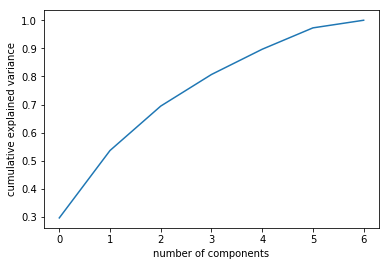

In [66]:
pca = PCA().fit(standardizedData1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [67]:
standardizedData2 = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=4)

principalComponents2 = pca.fit_transform(X = standardizedData2)

print(pca.explained_variance_ratio_.sum())

0.8596899628967274


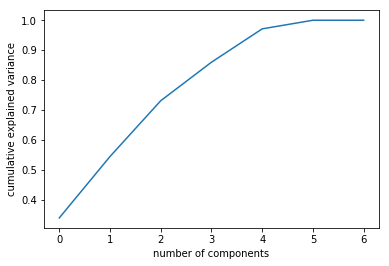

In [68]:
pca = PCA().fit(standardizedData2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

If we choose 4 components for test data then we represent 86% variance.

In [69]:
dataframe_train=pd.DataFrame(principalComponents1, columns = ['PC1','PC2','PC3','PC4'])

In [70]:
dataframe_test=pd.DataFrame(principalComponents2, columns = ['PC1','PC2','PC3','PC4'])

## Using machine learning

In [71]:
model = LogisticRegression()
model.fit(dataframe_train, Y_train)
Y_pred = model.predict(dataframe_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(model,df_train,predictor_var,outcome_var)


Accuracy : 80.135%
Cross-Validation Score : 77.654%
Cross-Validation Score : 78.995%
Cross-Validation Score : 79.068%
Cross-Validation Score : 77.981%
Cross-Validation Score : 78.789%


## Let us try an another approach

In [72]:
corr = X_train.corr()

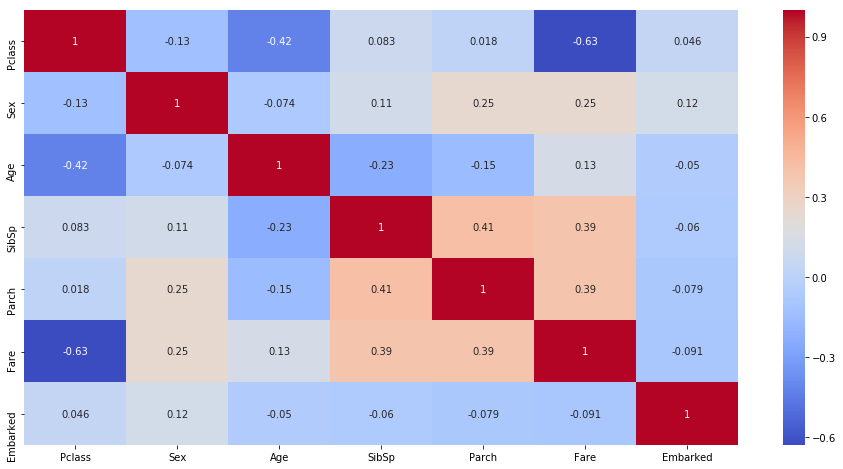

In [73]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True)

We can see a correlation Between Fare and Pclass
also between Parch and Sibsb 

Let us try to combine these features using PCA

In [74]:
pc1 = X_train.loc[:,['Fare','Pclass']] 
pc1_test = X_test.loc[:,['Fare','Pclass']] 
pc_test1 = df_train.loc[:,['Fare','Pclass']] 

pca =  PCA(n_components=1)
col = pca.fit_transform(pc1)
col_test = pca.fit_transform(pc1_test)
col_test1 = pca.fit_transform(pc_test1) 

X_train['PC1']=col[:,0]
X_test['PC1']=col_test[:,0]
df_train['PC1']=col_test1[:,0]

X_train=X_train.drop(['Fare','Pclass'], axis=1)
X_test=X_test.drop(['Fare','Pclass'], axis=1)
df_train=df_train.drop(['Fare','Pclass'], axis=1)

Let on do on Parch and Sibsb as well

In [75]:
pc2 = X_train.loc[:,['SibSp','Parch']] 
pc2_test = X_test.loc[:,['SibSp','Parch']] 
pc_test1 = df_train.loc[:,['SibSp','Parch']] 

pca =  PCA(n_components=1)
col = pca.fit_transform(pc2)
col_test = pca.fit_transform(pc2_test)
col_test1 = pca.fit_transform(pc_test1) 

X_train['PC2']=col[:,0]
X_test['PC2']=col_test[:,0]
df_train['PC2']=col_test1[:,0]

X_train=X_train.drop(['SibSp','Parch'], axis=1)
X_test=X_test.drop(['SibSp','Parch'], axis=1)
df_train=df_train.drop(['SibSp','Parch'], axis=1)

In [76]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(model,df_train,predictor_var,outcome_var)

Accuracy : 78.563%
Cross-Validation Score : 78.771%
Cross-Validation Score : 78.992%
Cross-Validation Score : 78.504%
Cross-Validation Score : 77.839%
Cross-Validation Score : 78.563%


Hence we can see the two methods in which we used PCA

Let us see other applications such as visulization

In [77]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_train)
print(X_train.shape)
print(projected.shape)

(891, 5)
(891, 2)


Text(0,0.5,'Second Principal Component')

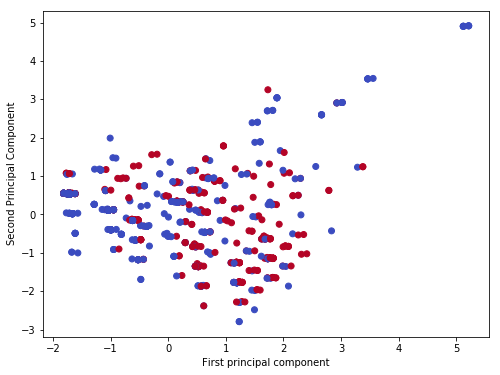

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(projected[:,0],projected[:,1],c=Y_train,cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')